In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import json
import re
import nltk
from nltk.corpus import inaugural
from collections import Counter
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Kristine\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

# Unsupervised Learning Capstone

Introduction

The dataset is a collection of the inaugurals of all the presidents of the United States. My two aims of this project is to 1) using NLP, compare and contrast the most frequent words that the following presidents used: Roosevelt, Truman, Eisenhower, Kennedy, Johnson, Nixon, Carter, Reagan, Bush Sr, Clinton, Bush Jr and Obama. Then, we will use bag of words(BoW) and BoW features to create classification models such as linear regression, gradient boost, random forrest. which will determine if a word belongs to a presidents who is a democrat or to a president that is a republican. 

2) using TfidfVectorizer, analyse both Obama and Roosevelt's inaugurals. Furthermore, using SVD data reducer, we will optimise the process even further and will be able to group the sentences in the text into several different components and see how similar are they to each other. 

### Supervised NLP 

In [118]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [119]:
roosevelt45 = inaugural.raw('1945-Roosevelt.txt') 
truman = inaugural.raw('1949-Truman.txt')
eisenhower57 = inaugural.raw('1957-Eisenhower.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
johnson = inaugural.raw('1965-Johnson.txt')
nixon73 = inaugural.raw('1973-Nixon.txt')
carter = inaugural.raw('1977-Carter.txt')
reagan85 = inaugural.raw('1985-Reagan.txt')
bush_sr = inaugural.raw('1989-Bush.txt')
clinton97 = inaugural.raw('1997-Clinton.txt')
bush_jr05 = inaugural.raw('2005-Bush.txt')
obama09 = inaugural.raw('2009-Obama.txt')

In [125]:
def clean_text(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub('--',' ',text)
    text = re.sub('/\\n/g', "", text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub('\n\n', "", text)
    text = re.sub('\'s ', '', text)
    text = ' '.join(text.lower().split())
    
    return text
#remove any unwanted characters - if not a - z or space!!!!!!!!!!!!!!!!!!! google regex
#for president in address:
    #president = clean_text(president)
bush_sr =  ' '.join(bush_sr.split())
roosevelt = clean_text(roosevelt45)
truman = clean_text(truman)
eisenhower = clean_text(eisenhower57)
kennedy = clean_text(kennedy)
johnson = clean_text(johnson)
nixon = clean_text(nixon73)
carter = clean_text(carter)
reagan = clean_text(reagan85)
bush = clean_text(bush_sr)
clinton = clean_text(clinton97)
bush_jr = clean_text(bush_jr05)
obama = clean_text(obama09)

In [126]:
addresses = roosevelt + truman + eisenhower + kennedy + johnson + nixon + carter + reagan + bush + clinton + bush_jr + obama



In [127]:
import spacy
nlp = spacy.load('en')
roosevelt_doc = nlp(roosevelt) 
truman_doc = nlp(truman)
eisenhower_doc = nlp(eisenhower)
kennedy_doc = nlp(kennedy)
johnson_doc = nlp(johnson)
nixon_doc = nlp(nixon)
carter_doc = nlp(carter)
reagan_doc = nlp(reagan)
bush_sr_doc = nlp(bush_sr)
clinton_doc = nlp(clinton)
bush_jr_doc = nlp(bush_jr)
obama_doc = nlp(obama)

In [128]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=False):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words) 
# The most frequent words:
 
roosevelt_doc_freq = word_frequencies(roosevelt_doc).most_common(10)
truman_doc_freq  = word_frequencies(truman_doc).most_common(10)
eisenhower_doc_freq  = word_frequencies(eisenhower_doc).most_common(10)
kennedy_doc_freq  = word_frequencies(kennedy_doc).most_common(10)
johnson_doc_freq  = word_frequencies(johnson_doc).most_common(10)
nixon_doc_freq  = word_frequencies(nixon_doc).most_common(10)
carter_doc_freq  = word_frequencies(carter_doc).most_common(10)
reagan_doc_freq  = word_frequencies(reagan_doc).most_common(10)
bush_sr_doc_freq  = word_frequencies(bush_sr_doc).most_common(10)
clinton_doc_freq  = word_frequencies(clinton_doc).most_common(10)
bush_jr_doc_freq  = word_frequencies(bush_jr_doc).most_common(10)
obama_doc_freq  = word_frequencies(obama_doc).most_common(10)
print('Roosvelt:',roosevelt_doc_freq) 
print('Truman:',truman_doc_freq) 
print('Eisenhower:',eisenhower_doc_freq) 
print('Kennedy:',kennedy_doc_freq) 
print('Johnson:',johnson_doc_freq) 
print('Nixon:',nixon_doc_freq) 
print('Carter:',carter_doc_freq) 
print('Reagan:',reagan_doc_freq) 
print('Busn Sr:',bush_sr_doc_freq) 
print('Clinton:',clinton_doc_freq) 
print('Bush JR:',bush_jr_doc_freq) 
print('Obama:',obama_doc_freq) 


Roosvelt: [('shall', 7), ('peace', 5), ('learned', 5), ('today', 4), ('men', 4), ('test', 3), ('way', 3), ('simple', 2), ('courage', 2), ('presence', 2)]
Truman: [('nations', 21), ('world', 17), ('peace', 12), ('freedom', 11), ('free', 11), ('people', 10), ('united', 10), ('new', 8), ('peoples', 8), ('believe', 8)]
Eisenhower: [('nations', 14), ('world', 13), ('seek', 10), ('freedom', 10), ('peace', 9), ('people', 9), ('help', 6), ('justice', 5), ('know', 5), ('earth', 5)]
Kennedy: [('let', 11), ('sides', 8), ('new', 7), ('pledge', 7), ('world', 6), ('citizens', 5), ('power', 5), ('shall', 5), ('ask', 5), ('president', 4)]
Johnson: [('change', 11), ('nation', 10), ('people', 9), ('union', 9), ('man', 8), ('world', 7), ('old', 7), ('american', 6), ('land', 6), ('liberty', 6)]
Nixon: [('new', 15), ('peace', 14), ('let', 13), ('america', 12), ('world', 10), ('responsibility', 10), ('great', 9), ('government', 9), ('shall', 7), ('home', 7)]
Carter: [('nation', 10), ('new', 9), ('strength',

In [93]:
# Utility function to calculate how frequently lemas appear in the text.
def lemma_frequencies(text, include_stop=False):
    
    # Build a list of lemas.
    # Strip out punctuation and, optionally, stop words.
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    # Build and return a Counter object containing word counts.
    return Counter(lemmas)

# Instantiate our list of most common lemmas.
roosevelt_lemma_freq = lemma_frequencies(roosevelt_doc).most_common(10)
truman_lemma_freq  = lemma_frequencies(truman_doc).most_common(10)
eisenhower_lemma_freq  = lemma_frequencies(eisenhower_doc).most_common(10)
kennedy_lemma_freq  = lemma_frequencies(kennedy_doc).most_common(10)
johnson_lemma_freq  = lemma_frequencies(johnson_doc).most_common(10)
nixon_lemma_freq  = lemma_frequencies(nixon_doc).most_common(10)
carter_lemma_freq  = lemma_frequencies(carter_doc).most_common(10)
reagan_lemma_freq  = lemma_frequencies(reagan_doc).most_common(10)
bush_sr_lemma_freq  = lemma_frequencies(bush_sr_doc).most_common(10)
clinton_lemma_freq  = lemma_frequencies(clinton_doc).most_common(10)
bush_jr_lemma_freq  = lemma_frequencies(bush_jr_doc).most_common(10)
obama_lemma_freq  = lemma_frequencies(obama_doc).most_common(10)
print('Roosvelt:',roosevelt_lemma_freq) 
print('Truman:',truman_lemma_freq) 
print('Eisenhower:',eisenhower_lemma_freq) 
print('Kennedy:',kennedy_lemma_freq) 
print('Johnson:',johnson_lemma_freq) 
print('Nixon:',nixon_lemma_freq) 
print('Carter:',carter_lemma_freq) 
print('Reagan:',reagan_lemma_freq) 
print('Busn Sr:',bush_sr_lemma_freq) 
print('Clinton:',clinton_lemma_freq) 
print('Bush JR:',bush_jr_lemma_freq) 
print('Obama:',obama_lemma_freq) 



Roosvelt: [('shall', 7), ('peace', 6), ('learn', 5), ('today', 4), ('man', 4), ('way', 4), ('test', 3), ('friend', 2), ('simple', 2), ('courage', 2)]
Truman: [('world', 23), ('people', 20), ('nation', 18), ('peace', 15), ('freedom', 13), ('free', 11), ('country', 11), ('man', 10), ('United', 10), ('security', 9)]
Eisenhower: [('nation', 17), ('people', 15), ('world', 15), ('seek', 12), ('freedom', 11), ('peace', 10), ('know', 9), ('hope', 8), ('help', 8), ('great', 7)]
Kennedy: [('let', 16), ('world', 8), ('side', 8), ('power', 7), ('new', 7), ('pledge', 7), ('nation', 6), ('ask', 6), ('citizen', 5), ('man', 5)]
Johnson: [('man', 12), ('nation', 9), ('people', 9), ('change', 9), ('world', 7), ('old', 7), ('land', 6), ('union', 6), ('generation', 5), ('new', 5)]
Nixon: [('let', 22), ('America', 21), ('peace', 19), ('world', 17), ('responsibility', 16), ('new', 15), ('nation', 14), ('great', 10), ('year', 9), ('home', 9)]
Carter: [('new', 9), ('Nation', 7), ('strength', 7), ('nation', 7)

In [94]:
# Group into sentences.

roosevelt_sents = [[sent, "Democrat"] for sent in roosevelt_doc.sents]
truman_sents = [[sent, "Democrat"] for sent in truman_doc.sents]
eisenhower_sents = [[sent, "Republican"] for sent in eisenhower_doc.sents]
kennedy_sents = [[sent, "Democrat"] for sent in kennedy_doc.sents]
johnson_sents = [[sent, "Democrat"] for sent in johnson_doc.sents]
nixon_sents = [[sent, "Republican"] for sent in nixon_doc.sents]
carter_sents = [[sent, "Democrat"] for sent in carter_doc.sents]
reagan_sents = [[sent, "Republican"] for sent in reagan_doc.sents]
bush_sr_sents = [[sent, "Republican"] for sent in bush_sr_doc.sents]
clinton_sents = [[sent, "Democrat"] for sent in clinton_doc.sents]
bush_jr_sents = [[sent, "Republican"] for sent in bush_jr_doc.sents]
obama_sents = [[sent, "Democrat"] for sent in obama_doc.sents]


# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(roosevelt_sents + 
        truman_sents +
        eisenhower_sents +
        kennedy_sents +
        johnson_sents +
        nixon_sents +
        carter_sents +
        reagan_sents +
        bush_sr_sents +
        clinton_sents +
        bush_jr_sents +
        obama_sents)
sentences.head()

,0,1
0,"(Chief, Justice, ,, Mr., Vice, President, ,, m...",Democrat
1,"(We, Americans, of, today, ,, together, with, ...",Democrat
2,"(It, is, a, test, of, our, courage, of, our, r...",Democrat
3,"(If, we, meet, that, test, successfully, and, ...",Democrat
4,"(As, I, stand, here, today, ,, having, taken, ...",Democrat


In [95]:
def bag_of_words(text):
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    return [item[0] for item in Counter(allwords).most_common(2000)]

def bow_features(sentences, common_words):
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_party'] = sentences[1]
    df.loc[:,common_words] = 0
    
    for i, sentence in enumerate(df['text_sentence']):
        words = [token.lemma_ 
                for token in sentence
                if (
                    not token.is_punct
                    and not token.is_stop
                    and token.lemma_ in common_words
                )]
        for word in words:
            df.loc[i, word] += 1
        if i%100 == 0:
            print('Processing row {}'.format(i))
    return df

In [96]:
roosevelt_words = bag_of_words(roosevelt_doc)
truman_words = bag_of_words(truman_doc)
eisenhower_words = bag_of_words(eisenhower_doc)
kennedy_words = bag_of_words(kennedy_doc)
johnson_words = bag_of_words(johnson_doc)
nixon_words = bag_of_words(nixon_doc)
carter_words = bag_of_words(carter_doc)
reagan_words = bag_of_words(reagan_doc)
bush_sr_words = bag_of_words(bush_sr_doc)
clinton_words = bag_of_words(clinton_doc)
bush_jr_words = bag_of_words(bush_jr_doc)
obama_words = bag_of_words(obama_doc)

common_words = set(roosevelt_words +
        truman_words + 
        eisenhower_words + 
        kennedy_words +
        johnson_words +
        nixon_words +
        carter_words +
        reagan_words +
        bush_sr_words +
        clinton_words +
        bush_jr_words +
        obama_words)

In [97]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 100
Processing row 200
Processing row 300
Processing row 400
Processing row 500
Processing row 600
Processing row 700
Processing row 800
Processing row 900
Processing row 1000
Processing row 1100


,unclimbed,weight,State,stately,pretend,vast,prophet,connection,occur,1984,...,wound,importance,imperialism,Soviets,command,turmoil,sincere,repression,text_sentence,text_party
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Chief, Justice, ,, Mr., Vice, President, ,, m...",Democrat
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(We, Americans, of, today, ,, together, with, ...",Democrat
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(It, is, a, test, of, our, courage, of, our, r...",Democrat
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,"(If, we, meet, that, test, successfully, and, ...",Democrat
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(As, I, stand, here, today, ,, having, taken, ...",Democrat


In [98]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_party']
X = np.array(word_counts.drop(['text_sentence','text_party'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set score: 0.9845788849347569

Test set score: 0.5531914893617021


In [99]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(843, 2495) (843,)
Training set score: 0.963226571767497

Test set score: 0.5638297872340425


In [100]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

Training set score: 0.8374851720047449

Test set score: 0.5070921985815603


### Unsupervised NLP

In [101]:
import nltk
import re
from sklearn.model_selection import train_test_split
from nltk.corpus import inaugural


#reading in the data, this time in the form of paragraphs
roosevelt = inaugural.paras('1945-Roosevelt.txt') 
truman = inaugural.paras('1949-Truman.txt')
eisenhower = inaugural.paras('1957-Eisenhower.txt')
kennedy = inaugural.paras('1961-Kennedy.txt')
johnson = inaugural.paras('1965-Johnson.txt')
nixon = inaugural.paras('1973-Nixon.txt')
carter = inaugural.paras('1977-Carter.txt')
reagan = inaugural.paras('1985-Reagan.txt')
bush_sr = inaugural.paras('1989-Bush.txt')
clinton = inaugural.paras('1997-Clinton.txt')
bush_jr = inaugural.paras('2005-Bush.txt')
obama = inaugural.paras('2009-Obama.txt')
#processing
roosevelt_paras=[]
for paragraph in roosevelt:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    para=[re.sub('/\\n/g', "", word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    roosevelt_paras.append(' '.join(para))

print(roosevelt_paras[0:4])

obama_paras=[]
for paragraph in obama:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    para=[re.sub('/\\n/g', "", word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    obama_paras.append(' '.join(para))

print(obama_paras[0:4])

['Chief Justice , Mr . Vice President , my friends , you will understand and , I believe , agree with my wish that the form of this inauguration be simple and its words brief .', 'We Americans of today , together with our allies , are passing through a period of supreme test .', 'If we meet that test  successfully and honorably  we shall perform a service of historic importance which men and women and children will honor throughout all time .', "As I stand here today , having taken the solemn oath of office in the presence of my fellow countrymen  in the presence of our God  I know that it is America ' s purpose that we shall not fail ."]
['My fellow citizens :', 'I stand here today humbled by the task before us , grateful for the trust you have bestowed , mindful of the sacrifices borne by our ancestors .', 'Forty - four Americans have now taken the presidential oath .', 'So it has been .']


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(roosevelt_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
roosevelt_paras_tfidf=vectorizer.fit_transform(roosevelt_paras)
print("Number of features: %d" % roosevelt_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(roosevelt_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 14
Original sentence: As I stand here today , having taken the solemn oath of office in the presence of my fellow countrymen  in the presence of our God  I know that it is America ' s purpose that we shall not fail .
Tf_idf vector: {'god': 0.5573997703441839, 'fellow': 0.5573997703441839, 'shall': 0.41611405025804205, 'today': 0.4532770556937}


In [103]:
X_train1, X_test1 = train_test_split(obama_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
obama_paras_tfidf=vectorizer.fit_transform(obama_paras)
print("Number of features: %d" % obama_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf1, X_test_tfidf1= train_test_split(obama_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr1 = X_train_tfidf1.tocsr()

#number of paragraphs
n = X_train_tfidf_csr1.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara1 = [{} for _ in range(0,n)]
#List of features
terms1 = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr1.nonzero()):
    tfidf_bypara1[i][terms1[j]] = X_train_tfidf_csr1[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train1[5])
print('Tf_idf vector:', tfidf_bypara1[5])

Number of features: 27
Original sentence: On this day , we gather because we have chosen hope over fear , unity of purpose over conflict and discord .
Tf_idf vector: {'hope': 0.7366305251840556, 'day': 0.6762954009654822}


In [104]:
X_train

['The Almighty God has blessed our land in many ways .',
 'We have learned that we cannot live alone , at peace ; that our own well - being is dependent on the well - being of other nations far away .',
 'I remember that my old schoolmaster , Dr . Peabody , said , in days that seemed to us then to be secure and untroubled : " Things in life will not always run smoothly .',
 'So we pray to Him now for the vision to see our way clearly  to see the way that leads to a better life for ourselves and for all our fellow men  to the achievement of His will to peace on earth .',
 'We have learned to be citizens of the world , members of the human community .',
 "As I stand here today , having taken the solemn oath of office in the presence of my fellow countrymen  in the presence of our God  I know that it is America ' s purpose that we shall not fail .",
 'Chief Justice , Mr . Vice President , my friends , you will understand and , I believe , agree with my wish that the form of this inaugurat

In [105]:
X_train1

['On this day , we come to proclaim an end to the petty grievances and false promises , the recriminations and worn - out dogmas that for far too long have strangled our politics .',
 'For us , they fought and died , in places like Concord and Gettysburg ; Normandy and Khe Sahn .',
 'These are the indicators of crisis , subject to data and statistics .',
 'Now , there are some who question the scale of our ambitions  who suggest that our system cannot tolerate too many big plans .',
 'Time and again these men and women struggled and sacrificed and worked till their hands were raw so that we might live a better life .',
 'On this day , we gather because we have chosen hope over fear , unity of purpose over conflict and discord .',
 'As we consider the road that unfolds before us , we remember with humble gratitude those brave Americans who , at this very hour , patrol far - off deserts and distant mountains .',
 'I stand here today humbled by the task before us , grateful for the trust 

Dimenstion Reduction

In [106]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(14)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa1 = lsa.fit_transform(X_train_tfidf1)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component1=pd.DataFrame(X_train_lsa1,index=X_train1)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component1.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 100.0
Component 0:
That we are in the midst of crisis is now well understood .                                                                                                                                                                                                                                                           0.880238
These are the indicators of crisis , subject to data and statistics .                                                                                                                                                                                                                                                 0.880238
Nor is the question before us whether the market is a force for good or ill . Its power to generate wealth and expand freedom is unmatched , but this crisis has reminded us that without a watchful eye , the market can spin out of control  the nation cannot prosper long when it favors only the pros

Name: 2, dtype: float64
Component 3:
Now , there are some who question the scale of our ambitions  who suggest that our system cannot tolerate too many big plans .                                                                                                                                                                                        7.767636e-01
Nor is the question before us whether the market is a force for good or ill . Its power to generate wealth and expand freedom is unmatched , but this crisis has reminded us that without a watchful eye , the market can spin out of control  the nation cannot prosper long when it favors only the prosperous .    3.987467e-01
For us , they fought and died , in places like Concord and Gettysburg ; Normandy and Khe Sahn .                                                                                                                                                                                                                       1.86167

In [107]:
len(X_train1)

21

In [108]:
#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(7)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 97.42540729824451
Component 0:
We have learned that we cannot live alone , at peace ; that our own well - being is dependent on the well - being of other nations far away .                                                           0.865649
We have learned the simple truth , as Emerson said , that " The only way to have a friend is to be one ."                                                                                               0.737397
We have learned to be citizens of the world , members of the human community .                                                                                                                          0.696763
We can and we will achieve such a peace .                                                                                                                                                               0.527640
So we pray to Him now for the vision to see our way clearly  to see the way that leads t

Name: 4, dtype: float64


In [109]:
len(X_train)

9

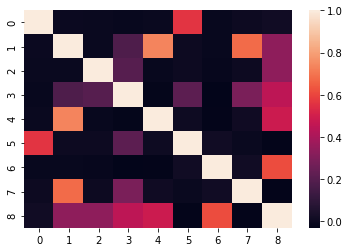

Key:
0 The Almighty God has blessed our land in many ways .
1 We have learned that we cannot live alone , at peace ; that our own well - being is dependent on the well - being of other nations far away .
2 I remember that my old schoolmaster , Dr . Peabody , said , in days that seemed to us then to be secure and untroubled : " Things in life will not always run smoothly .
3 So we pray to Him now for the vision to see our way clearly  to see the way that leads to a better life for ourselves and for all our fellow men  to the achievement of His will to peace on earth .
4 We have learned to be citizens of the world , members of the human community .
5 As I stand here today , having taken the solemn oath of office in the presence of my fellow countrymen  in the presence of our God  I know that it is America ' s purpose that we shall not fail .
6 Chief Justice , Mr . Vice President , my friends , you will understand and , I believe , agree with my wish that the form of this inauguration be 

In [113]:
import seaborn as sns
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:9,0:9]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(9))
plt.show()

#Generating a key for the plot.
#put len instead of hardcoding!!!!!!!!!!!
print('Key:')
for i in range(9):
    print(i,sim_matrix.index[i])

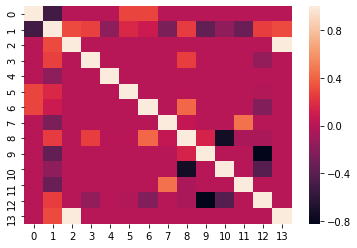

Key:
0 On this day , we come to proclaim an end to the petty grievances and false promises , the recriminations and worn - out dogmas that for far too long have strangled our politics .
1 For us , they fought and died , in places like Concord and Gettysburg ; Normandy and Khe Sahn .
2 These are the indicators of crisis , subject to data and statistics .
3 Now , there are some who question the scale of our ambitions  who suggest that our system cannot tolerate too many big plans .
4 Time and again these men and women struggled and sacrificed and worked till their hands were raw so that we might live a better life .
5 On this day , we gather because we have chosen hope over fear , unity of purpose over conflict and discord .
6 As we consider the road that unfolds before us , we remember with humble gratitude those brave Americans who , at this very hour , patrol far - off deserts and distant mountains .
7 I stand here today humbled by the task before us , grateful for the trust you have 

In [115]:
import seaborn as sns
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa1) * np.asmatrix(X_train_lsa1).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train1).iloc[0:14,0:14]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(14))
plt.show()

#Generating a key for the plot.
#put len instead of hardcoding!!!!!!!!!!!
print('Key:')
for i in range(14):
    print(i,sim_matrix.index[i])

# Conclusion

Aim N 1: We found which are the most frequent words that the presidents used in their inaugurals.For example, 
Truman: 'world', Reagan - 'people', both Bus Sr and Clinton used 'new' most frequently and Obama used 'nation' the most. We created several different models to determine if a word belongs to a presidents who is a democrat or to e president that is a republican.

Aim N 2: We used tfidf to divide the Obama and Roosevelt's inaugurals by paragraphs and determine the importance of the words in each sentence. We are not looking at the frequency only, but the weight of the words as well. We also reduced the number of the features and compared their similarity. The matrix shows low similarity between the components which means that the classification of each component is more distinct with the others.